# Handwritten Digit Recognition Using MLPClassifier 

## 1. Import Necessary imports

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


## 2. Upload Dataset

In [2]:
mnist_raw = loadmat("mnist-original.mat")

MNIST is a database. The acronym stands for “Modified National Institute of Standards and Technology.” The MNIST database contains handwritten digits (0 through 9), and can provide a baseline for testing image processing systems.

In [3]:
mnist_raw

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Nov 21 21:16:23 2016',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [4]:
mnist_raw["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
mnist_raw["data"].shape

(784, 70000)

In [6]:
mnist_raw["data"].T.shape

(70000, 784)

In [7]:
mnist_raw["label"][0]

array([0., 0., 0., ..., 9., 9., 9.])

In [8]:
mnist_raw["label"][0].shape

(70000,)

In [9]:
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
     }

X,y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

##  3. Train Test Split

In [10]:
shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [11]:
y

array([7., 5., 0., ..., 4., 3., 2.])

In [12]:
y.shape

(70000,)

## 4. Dataset Visualization 

In [13]:
some_digit = X[36000]

In [14]:
some_digit.shape

(784,)

In [15]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
some_digit_image = some_digit.reshape(28, 28)

In [17]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

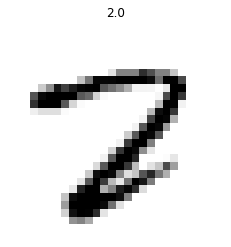

In [18]:
plt.imshow(
    some_digit_image, 
    cmap = plt.cm.binary,
    )

plt.title(y[36000])
plt.axis("off")
plt.show()

### View First 100 Training Data Points

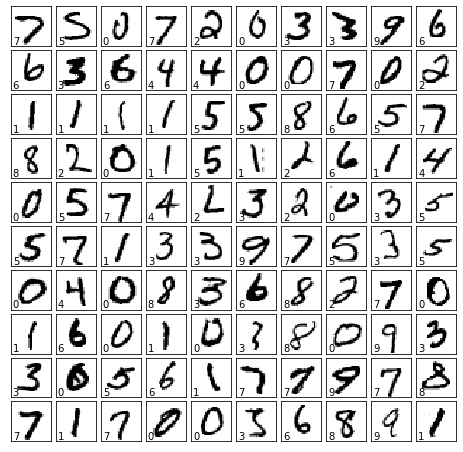

In [19]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(int(y_train[i])),
           transform=ax.transAxes, color='black')

plt.show()

## 5. Training MLPClassifier

In [20]:
X_train.shape

(60000, 784)

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=True, tol=1e-5, random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.86100680
Iteration 2, loss = 0.95306583
Iteration 3, loss = 0.76112670
Iteration 4, loss = 0.45284727
Iteration 5, loss = 0.33421617
Iteration 6, loss = 0.30005119
Iteration 7, loss = 0.28315353
Iteration 8, loss = 0.27026020
Iteration 9, loss = 0.25634947
Iteration 10, loss = 0.24667450


C:\Users\muhammad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=1, solver='sgd', tol=1e-05,
              verbose=True)

In [22]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.927933
Test set score: 0.917700


In [23]:
yfit = mlp.predict(X_test)

In [24]:
y_test.shape

(10000,)

In [25]:
from sklearn.metrics import classification_report

tn = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, yfit,
                            target_names=tn))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       941
           1       0.99      0.97      0.98      1120
           2       0.96      0.87      0.91      1013
           3       0.86      0.94      0.90      1054
           4       0.91      0.94      0.93       994
           5       0.92      0.85      0.88       945
           6       0.96      0.93      0.94       967
           7       0.90      0.96      0.93      1017
           8       0.86      0.94      0.90       960
           9       0.89      0.81      0.85       989

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



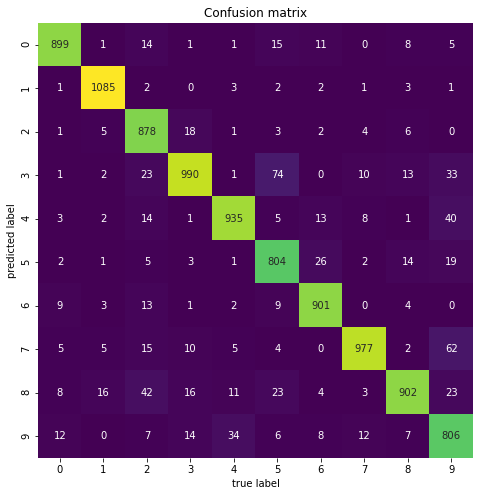

In [26]:
mat = confusion_matrix(y_test, yfit)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=tn,
            yticklabels=tn,
            ax=ax)
plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
from sklearn.metrics import accuracy_score

print("Accuracy", accuracy_score(y_test, yfit)*100)

Accuracy 91.77


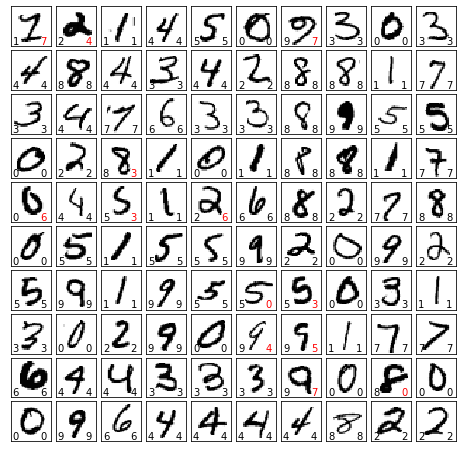

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    # actual class
    ax.text(0.05, 0.05, str(int(y_test[i])),
            transform=ax.transAxes, 
            color='black')    
    # predict class
    ax.text(0.75, 0.05, str(int(yfit[i])),
            transform=ax.transAxes, 
            color='black' if yfit[i] == y_test[i] else 'red')

plt.show()